# Predicting the CO2 emission for new light-duty vehicles in Canada using Multi-variate Linear Regression

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Importing dataset

In [2]:
fuel_df = pd.read_csv("FuelConsumptionCo2.csv")

In [3]:
fuel_df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
fuel_df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# Removing unnecessary features
X = fuel_df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"]]
y = fuel_df[["CO2EMISSIONS"]]

In [6]:
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


In [7]:
X.describe()
# the range of values is not very large, therefore no normalization is required

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000


In [8]:
y.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


### Train/ test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((853, 6), (853, 1), (214, 6), (214, 1))

### Analysing dependence on different features

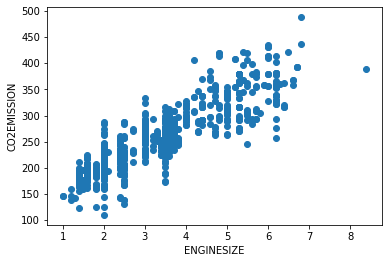

In [11]:
plt.scatter(X_train[["ENGINESIZE"]], y_train)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSION")
plt.show()

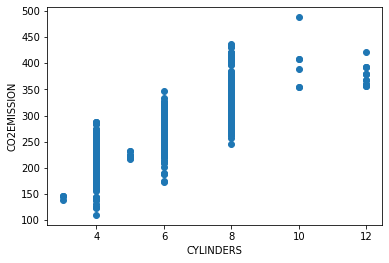

In [12]:
plt.scatter(X_train[["CYLINDERS"]], y_train)
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSION")
plt.show()

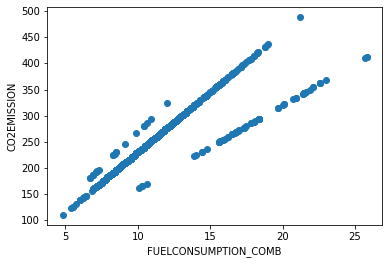

In [13]:
plt.scatter(X_train[["FUELCONSUMPTION_COMB"]], y_train)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSION")
plt.show()

## Training the model

### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.coef_

array([[  8.96115125,   7.24023686, -13.00156667,  -5.47215573,
         21.86697334,  -4.03446041]])

In [18]:
model.intercept_

array([262.57216087])

## Testing the model on testset

In [19]:
from sklearn.metrics import r2_score

In [20]:
y_test_predict = model.predict(X_test)

In [21]:
print("R2_score : ", r2_score(y_test, y_test_predict))

R2_score :  0.9034041224574011


## Improving accuracy by generating more features

In [22]:
from sklearn import preprocessing

In [23]:
# got maximum accuracy for ploynomial of degree 6
poly = preprocessing.PolynomialFeatures(degree = 6, interaction_only = True)
X_train_temp = poly.fit_transform(X_train)
X_test_temp = poly.fit_transform(X_test)
X_train_temp.shape, X_test_temp.shape

((853, 64), (214, 64))

In [24]:
model.fit(X_train_temp, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
print("R2_score : ", r2_score(y_test, model.predict(X_test_temp)))

R2_score :  0.9426567266939535


## Predicting on user input

In [26]:
userInput = [[3.4, 6.0, 11.5, 7.1, 9.2, 42.0]]
userInput = poly.fit_transform(userInput)
y_predict = model.predict(userInput)
print("The CO2 emission would be : ",y_predict)

The CO2 emission would be :  [[205.46423236]]
